In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [ ]:
pre_survey = pd.read_csv('pre_survey.csv')
pre_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pre_class_time_spent             92 non-null     int64  
 1   RecipientEmail                   90 non-null     object 
 2   pre_class_DistributionChannel    92 non-null     object 
 3   CVQ1_gender_bool                 69 non-null     float64
 4   CVQ2_read_stubhub_case_bool      70 non-null     float64
 5   CVQ3_knowledge_causality_val     70 non-null     float64
 6   CVQ4_likeliness_participate_val  70 non-null     float64
 7   RQ1_understand_material_val      55 non-null     float64
 8   RQ2_remember_tomorrow_val        55 non-null     float64
 9   RQ3_active_involvement_val       55 non-null     float64
 10  Score                            92 non-null     int64  
 11  Treatment                        90 non-null     float64
 12  Progress                

In [ ]:
post_survey = pd.read_csv('post_survey.csv')
post_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   post_class_time_spent                       69 non-null     int64  
 1   RecipientEmail                              69 non-null     object 
 2   post_class_DistributionChannel              69 non-null     object 
 3   post_class_recall_val                       57 non-null     float64
 4   post_class_class_participation_val          57 non-null     float64
 5   post_class_preparedness_val                 57 non-null     float64
 6   post_class_willingness_to_participate_bool  57 non-null     float64
 7   post_class_choice                           57 non-null     object 
 8   post_class_feedback                         7 non-null      object 
 9   Group                                       69 non-null     int64  
 10  post_class_incom

In [ ]:
merged_survey = pd.merge(pre_survey, post_survey, on='RecipientEmail', how='left')
merged_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   pre_class_time_spent                        92 non-null     int64  
 1   RecipientEmail                              90 non-null     object 
 2   pre_class_DistributionChannel               92 non-null     object 
 3   CVQ1_gender_bool                            69 non-null     float64
 4   CVQ2_read_stubhub_case_bool                 70 non-null     float64
 5   CVQ3_knowledge_causality_val                70 non-null     float64
 6   CVQ4_likeliness_participate_val             70 non-null     float64
 7   RQ1_understand_material_val                 55 non-null     float64
 8   RQ2_remember_tomorrow_val                   55 non-null     float64
 9   RQ3_active_involvement_val                  55 non-null     float64
 10  Score           

In [ ]:
pre_survey.groupby('Treatment')['pre_class_time_spent'].describe().T

Treatment,0.0,1.0
count,44.000000,46.000000
mean,6705.772727,7517.500000
std,15709.146453,14167.174726
min,8.000000,10.000000
25%,32.500000,58.250000
50%,137.000000,262.500000
75%,870.750000,6090.000000
max,69706.000000,52950.000000


Some people took the quiz and then probably completed the next day when the professor shared the QR code. Mode might be a better metric to measure the difference in time spent. The time spent by people in treatment is twice as much as the time spent by control.

In [ ]:
#Expressed in percentages
pre_survey.groupby('Treatment')['pre_class_incomplete'].value_counts()*100/pre_survey.groupby('Treatment')['pre_class_incomplete'].count()

Treatment  pre_class_incomplete
0.0        0                       70.454545
           1                       29.545455
1.0        0                       52.173913
           1                       47.826087
dtype: float64

More % of people from the Treatment didn't complete the survey, probably because it was too long.


In [ ]:
pre_survey.groupby('CVQ2_read_stubhub_case_bool')['pre_class_incomplete'].value_counts()*100/pre_survey.groupby('CVQ2_read_stubhub_case_bool')['pre_class_incomplete'].count()

CVQ2_read_stubhub_case_bool  pre_class_incomplete
0.0                          0                       64.705882
                             1                       35.294118
1.0                          0                       83.018868
                             1                       16.981132
dtype: float64

The percentage of people who read the case and didnt finish the survey is half as much as the ones that didnt read the case and didnt finish the survey.

In [ ]:
pre_survey.groupby(['CVQ2_read_stubhub_case_bool', 'Treatment'])['pre_class_time_spent'].describe().T

CVQ2_read_stubhub_case_bool           0.0                         1.0  \
Treatment                             0.0           1.0           0.0   
count                            9.000000      8.000000     25.000000   
mean                         10547.888889  15020.750000   5941.880000   
std                          23139.706688  20382.016869  12541.145902   
min                             31.000000     42.000000     30.000000   
25%                            100.000000    335.500000     69.000000   
50%                            205.000000   2637.000000    160.000000   
75%                           3967.000000  29699.000000   1668.000000   
max                          69706.000000  52950.000000  43135.000000   

CVQ2_read_stubhub_case_bool                
Treatment                             1.0  
count                           28.000000  
mean                          7055.071429  
std                          13258.486998  
min                             29.000000  
25%                            144.000000  
50%                            334.500000  
75%                           6312.250000  
max                          46429.000000

People who read the case on average spent less time than the people who didnt read the case.

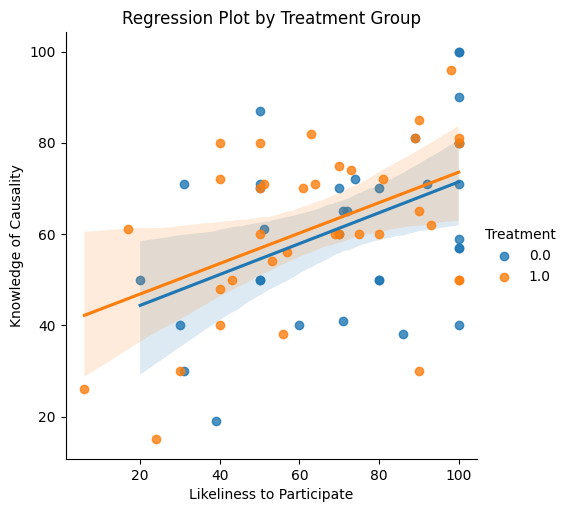

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(
    data=pre_survey,
    x="CVQ4_likeliness_participate_val",
    y="CVQ3_knowledge_causality_val",
    hue="Treatment")

plt.xlabel("Likeliness to Participate")
plt.ylabel("Knowledge of Causality")
plt.title("Regression Plot by Treatment Group")
plt.show()


Higher knowledge in the subject has some correlation with likeliness to participate in class.

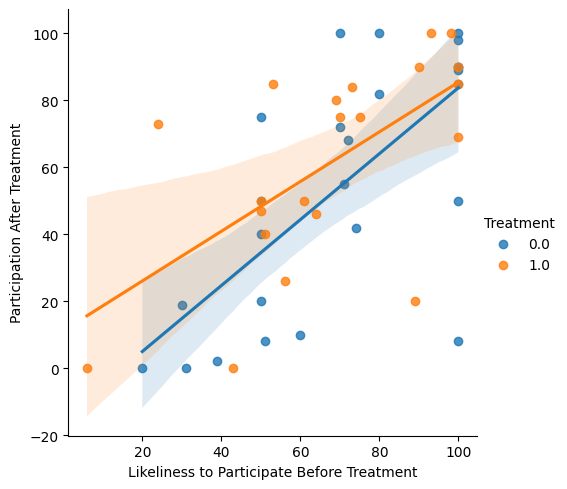

In [ ]:
sns.lmplot(
    data=merged_survey,
    x="CVQ4_likeliness_participate_val",
    y="post_class_class_participation_val",
    hue="Treatment")

plt.xlabel("Likeliness to Participate Before Treatment")
plt.ylabel("Participation After Treatment")
plt.show()

Participation scores before and After treatment have a strong correlation.

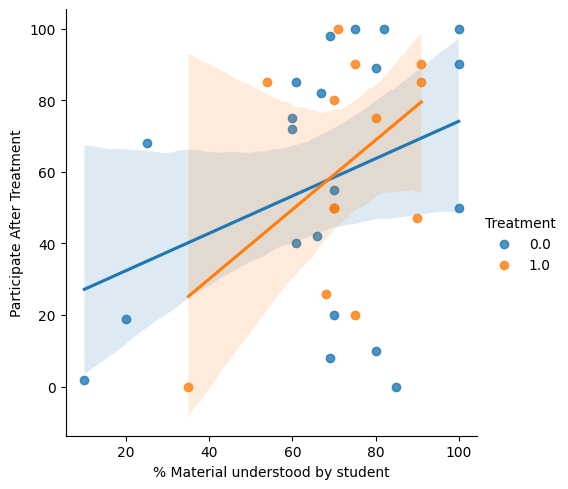

In [ ]:
sns.lmplot(
    data=merged_survey,
    x="RQ1_understand_material_val",
    y="post_class_class_participation_val",
    hue= 'Treatment')

plt.xlabel("% Material understood by student")
plt.ylabel("Participate After Treatment")
plt.show()

Understanding the material has a correlation with participation in the class.


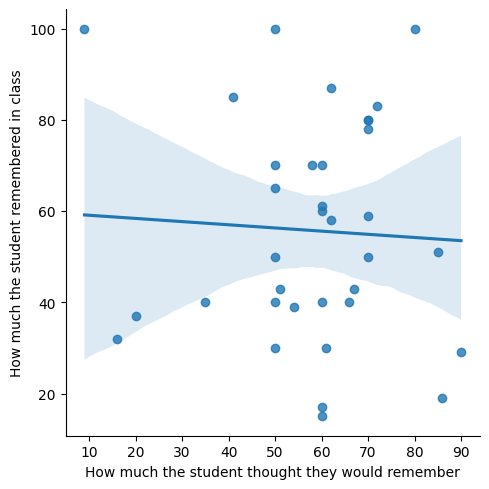

In [ ]:
sns.lmplot(
    data=merged_survey,
    x="RQ2_remember_tomorrow_val",
    y="post_class_recall_val",
)

plt.xlabel("How much the student thought they would remember")
plt.ylabel("How much the student remembered in class")
plt.show()

Indicates that whatever the student thought they would remember in class (RQ2_remember_tomorrow_val), might not be an accurate representation of how much the student actually remembered in class.

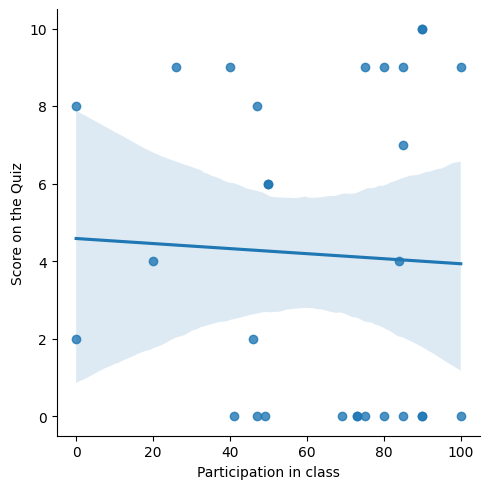

In [ ]:
sns.lmplot(
    data=merged_survey[merged_survey['Treatment']==1],
    x="post_class_class_participation_val",
    y="Score")

plt.xlabel("Participation in class")
plt.ylabel("Score on the Quiz")
plt.show()

Scoring high on the quiz does not seem to have a strong relationship with class participation

In [ ]:
merged_survey.groupby('Treatment')['post_class_willingness_to_participate_bool'].value_counts()*100/ merged_survey.groupby('Treatment')['post_class_willingness_to_participate_bool'].count()

Treatment  post_class_willingness_to_participate_bool
0.0        1.0                                           75.757576
           0.0                                           24.242424
1.0        1.0                                           68.965517
           0.0                                           31.034483
dtype: float64

Interestingly, more percentage of people who got the quiz seemed to be more influenced to participate in class.

In [ ]:
merged_survey.groupby('Treatment')['post_class_choice'].value_counts()*100/ merged_survey.groupby('Treatment')['post_class_choice'].count()

Treatment  post_class_choice  
0.0        Pre-written Notes      60.606061
           Interactive Quizzes    36.363636
           No Preference           3.030303
1.0        Interactive Quizzes    41.379310
           Pre-written Notes      41.379310
           No Preference          17.241379
dtype: float64

People seem to be inclined towards the pre-written notes

Other

In [ ]:
#Expressed in percentage
pre_survey.groupby('Treatment')['pre_class_DistributionChannel'].value_counts()*100/pre_survey.groupby('Treatment')['pre_class_DistributionChannel'].count()

Treatment  pre_class_DistributionChannel
0.0        anonymous                        79.545455
           qr                               20.454545
1.0        anonymous                        80.434783
           qr                               19.565217
dtype: float64